# Chapter 3. Resolution

Recreate the projection of caffeine that you made in the first part. If you didn't make a script for this already, I suggest that you do so now. This file should create the $hk$-plane out to a given cut-off, calculate the molecular transform of caffeine on that plane, inverse transform to yield the projection, and display the projection with **imshow**.

Once you have recreated the projection, try to gradually decrease the cut-off. <span style="color:blue">What happens to the atoms in the projection? What is the smallest cut-off that you can use and still distinguish individual (separated) atoms?</span>

In the previous section, we mentioned that the resolution is the inverse of the maximum length of the scattering vector. <span style="color:blue">Do you see what the relationship is between the maximum scattering vector and the cut-off variable? What is then the resolution you need to distinguish individual atoms?</span>

## 3.1 How does it all work?

**Bragg's law** &nbsp; One way to look at the concept of resolution is Bragg's law. In crystallography this is usually written as

$$
\frac{1}{d_{\text{min}}} = \frac{2\sin \theta_{\text{max}}}{\lambda}
$$

In this equation $\theta_{\text{max}}$ is half the maximum angle for which the scattered radiation is measured and $d_{\text{min}}$, the resolution, is interpreted as the smallest distance between resolvable lattice planes. Derived in slightly different way, the law says

$$
k_{\text{max}} = 2 k_{\text{in}} \sin \theta_{\text{max}}
$$

Here, $k_{\text{max}}$ is the maximum length of the scattering vector and $k_{\text{in}}$ is the length of the incident wave vector. From the left-hand side of the equations, you see that the resolution $d_{\text{min}}$ is equivalent to $1/k_{\text{max}}$. <span style="color:blue">Do you see that the right-hand side of two equations are equivalent?</span> (Remember the the definition of a wave vector). <span style="color:blue">What does $k_{\text{max}}$ correspond to in the planes that you created when calculating projections? In terms of the variables you used when creating projections, what is the resolution of the projections?</span>

**The convolution theorem** &nbsp; Once you have accepted the relationship between diffraction and the Fourier transform of the electron density, it is often simpler to understand properties of diffraction in terms of the properties of the Fourier transform. For example, the electron density is a real function, and the Fourier transform of a real function is always hermitian. The absolute value of an hermitian function is centrosymmetric (symmetric around the origin, or even). Therefore, diffraction data, which represent the absolute square of the molecular transform, are always centrosymmetric. You can see this if you look at one of your planes in Fourier space.

We will now look at the resolution concept from the viewpoint of Fourier transforms. The whole story is expressed by one of the most important theorems in Fourier analysis, the convolution theorem:

$$
\mathcal{F} \{ G \cdot H \} (r) = (g*h)(r) = \int h(r-u)g(u) \text{d} u
$$

The theorem says that if you take a function $G$, multiply by the function $H$ and Fourier transform the result, you will end up with the Fourier transform of $G$ (denoted $g$) convoluted with the Fourier transform of $H$ (denoted $h$). The convolution theorem is exceptionally useful and one of the main reasons for the wide-spread use of Fourier transforms in computing today.

In the following section we will take a look at how the convolution theorem relates the resolution of an image to the distance that the diffraction data extends from the origin of Fourier space.

- Evaluate the molecular transform of caffeine on two planes: **F10** (using a cut-off of 10) and **F2** (using a cut-off of 2).

In [1]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

# add path to the Modules
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

from Projection import *

In [2]:
# Read the pdb file for caffeine molecule.
caf = Molecule('caffeine.pdb')

In [3]:
# Distance between samples
step = 1/8.
cutoff = 10
H, K, L = TwoD_grid(step, cutoff)
F10 = moltrans(caf, H,K,L)

# Distance between samples
cutoff = 2
H, K, L = TwoD_grid(step, cutoff)
F2 = moltrans(caf, H,K,L)

- Calculate projection images from these two planes (call them **rho10** and **rho2**).

In [4]:
rho10 = fft.fftshift(abs(fft.ifftn(F10, [2**10, 2**10])))
rho2 = fft.fftshift(abs(fft.ifftn(F2, [2**10, 2**10])))

- Create a rectangular window **W**

In [5]:
W = squarewin2(F2.shape, F10.shape)

- Multiply **F10** and **W**

In [6]:
F10W = F10*W

- Calculate the projection image corresponding to **F10W** (call it **rhoConv**).

In [7]:
rhoConv = fft.fftshift(abs(fft.ifftn(F10W, [2**10, 2**10])))

- Finally, calculate the transform of **W**

In [8]:
w = fft.fftshift(abs(fft.ifftn(W, [2**10, 2**10])))

Now plot **F10**, **F2**, **F10W** and **W**. Use subplot to display them all in a single figure. Set the colorbar range *[-12,9]* for **F10**, **F2**, **F10W** but for **W** to display the plots on the same color scale.

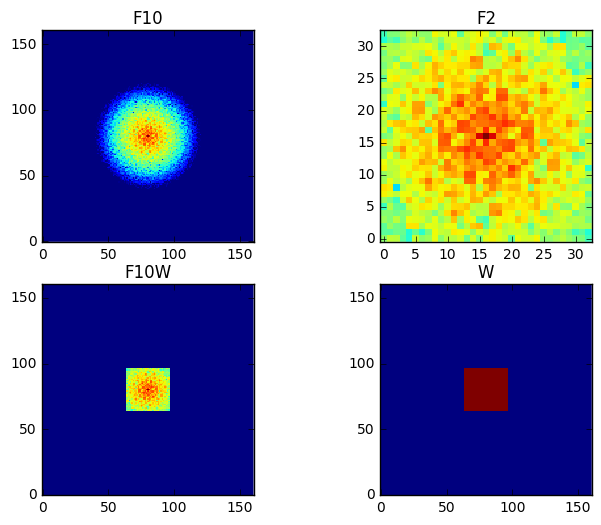

In [9]:
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(np.log(abs(F10)**2), interpolation='none',origin='lower', vmin=-12, vmax=9)
ax[0,0].set_title('F10')

ax[0,1].imshow(np.log(abs(F2)**2), interpolation='none',origin='lower', vmin=-12, vmax=9)
ax[0,1].set_title('F2')

tmp = abs(F10W)**2
tmp[tmp==0] = np.finfo(float).eps  # replace 0 with epsilon to avoid problem with taking np.log.
ax[1,0].imshow(np.log(tmp), interpolation='none',origin='lower', vmin=-12, vmax=9)
ax[1,0].set_title('F10W')

ax[1,1].imshow(W, interpolation='none',origin='lower')
ax[1,1].set_title('W')

Open a new figure and make four subplots containing **rho10**, **rho2**, **rhoConv** and **w**.

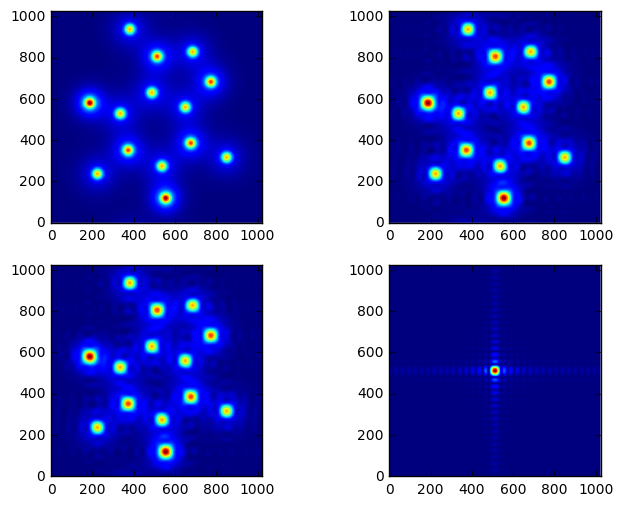

In [10]:
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(rho10, interpolation='none',origin='lower')
ax[0,1].imshow(rho2, interpolation='none',origin='lower')
ax[1,0].imshow(rhoConv, interpolation='none',origin='lower')
ax[1,1].imshow(w, interpolation='none',origin='lower')

If you take a closer look at **W**, you will see that it has the same size as the plane **F10** but that it takes value one within the area corresponding to **F2** and the value zero outside. It follows that **F2 = F10 · W** and that the images **F2** and **F10W** should be the identical but drawn at different scales. Check this by zooming in on **F10W**.

Now take a look at **rhoConv**. Applying what we said above and then the convolution theorem, we have

\begin{equation}
\begin{split}
\rho_{\text{conv}} &= \mathcal{F}^{-1} \{ F10 \cdot W \} = \mathcal{F}^{-1} \{ F2 \} \\
\rho_{\text{conv}} &= \rho_{10} * w = \rho_{2}
\end{split}
\end{equation}

where $w$ is the inverse Fourier transform of $W$. Hopefully, the images will show that **rhoConv** is identical to **rho2**.

The take-home message is the following: Since we don't measure the full, infinite, molecular transform (which we never can), we are in effect multiplying the infinite transform by some cut-off window (i.e. W). The effect of this in real space is **to convolute the true density with the transform of the cut-off window**. The effect of the convolution is to **smear out the density**, thus decreasing the resolution. In signal-processing terminology, $w$ is called a low-pass  lter. What is left after filtering is the low-frequency part of the density, corresponding to the inner part of the Fourier transform. $W$ is called the transfer function of the filter.

## 3.2 More on the rectangle function

Take another look at the Fourier transform of $W$. What you see is a two-dimensional **sinc** function,

$$
\text{sinc} (x,y) = \frac{\sin \pi x}{\pi x} \frac{\sin \pi y}{\pi y}
$$

The sinc function is also called the filtering function or interpolating function. It turns out that low-pass filtering and interpolation are related operations. If you look closely at the projection images, you can see the footprints of the **sinc** function in the form of electron density side-lobes around the atoms.

Plot the one-dimensional sinc function with Python.

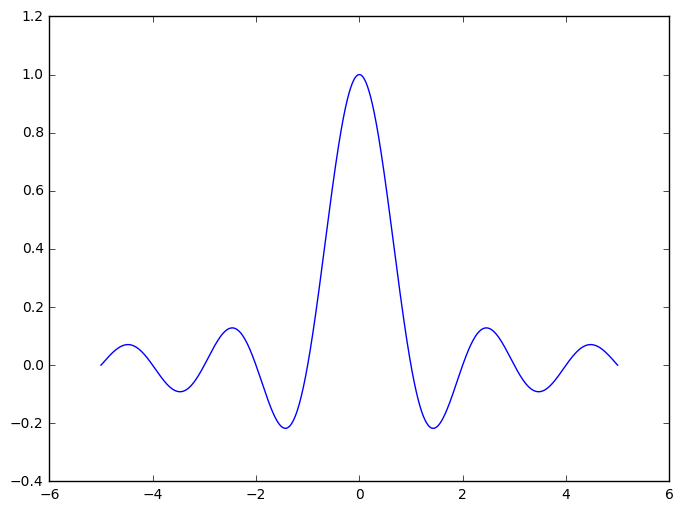

In [11]:
x = np.linspace(-5, 5, 1001)
plt.plot(x, np.sinc(x))

What is the width of the main lobe (central lobe) of the sinc-function? Try **plot(x,sinc(2*x))**. What is the width of the main lobe now? What is it for **sinc(0.5x)**? I guess this is pretty obvious from the equation. The interesting part comes here: The precise relationship between the sinc-function and the rectangle function W is

$$
\text{rect}(ak) = \mathcal{F} \left\{ \frac{1}{|a|} \text{sinc} \left( \frac{x}{a} \right) \right\}
$$

Or, in terms of the **cutoff** variable,

$$
\text{rect} \left(\frac{k}{2\cdot \text{cutoff}} \right) = \mathcal{F} \left\{ 2\cdot \text{cutoff} \cdot \text{sinc} (2\cdot \text{cutoff} \cdot x) \right\}
$$

<span style="color:blue">What is the relationship between the size of the cut-off in Fourier space, the width of the main lobe of the sinc function and what we call resolution?</span>